In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, Integer, Table, Column, MetaData

In [9]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

#['measurement', 'station']

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
Base.classes.keys()

['measurement', 'station']

# Precipitation Analysis

In [12]:
#Get the last date
finalDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(finalDate)

('2017-08-23',)


#### Retrieve the last 12 months of precipitation data

In [13]:
twelveMonthsBefore = dt.date(2017,8,23) - dt.timedelta(days=365)
print(twelveMonthsBefore)

2016-08-23


In [14]:
#Design a query to retrieve the last 12 months of precipitation data
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").\
    order_by(Measurement.date.desc()).all()
precipitation

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

#### Load the query results into a Pandas DF and set the index to the date column

In [15]:
#Load query results into a pandas dataframe and set the index to "Date" column
precipitation_df = pd.DataFrame(precipitation)
precipitationIndexed_df = precipitation_df.set_index("date")

#### Select only the date and prcp values and they are sorted by date

In [16]:
#Also sorted by date here
precipitationIndexed_df.head()

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


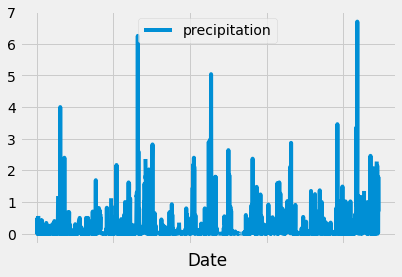

In [17]:
precipitation_df.plot("date", "prcp")
plt.xlabel("Date")
plt.ylabel("")
plt.legend(["precipitation"], loc="upper center")
plt.show()

In [18]:
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

#### Design a query to calculate the total number of stations

In [19]:
totalStations = session.query(Station.station).count()
print("There are {} total stations".format(totalStations))

There are 9 total stations


#### List the stations and observation counts in descending order

In [20]:
statAndObservationsList = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
statAndObservationsList

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

#### Which station has the highest number of observations?

In [21]:
print("Station", statAndObservationsList[1][0],"has the highest number of observations with",statAndObservationsList[0][1],"observations")

Station USC00519397 has the highest number of observations with 2772 observations


#### Retrive the last 12 months of temperature observation data (tobs)

In [22]:
tobsData = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").\
    order_by(Measurement.date).all()

In [23]:
tobsData_df = pd.DataFrame(tobsData)
finalTobsData = tobsData_df.sort_values("tobs", ascending=False).head(1)
finalTobsData

,station,tobs
1957,USC00517948,87.0


In [24]:
highestObsResults = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date > twelveMonthsBefore).all()

In [25]:
highestObsResults_df = pd.DataFrame(highestObsResults)

In [26]:
highestObsResultsIndexed_df = highestObsResults_df.set_index("station")

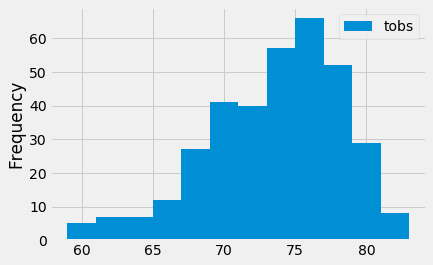

In [27]:
highestObsResultsIndexed_df.plot.hist(bins=12)
plt.xlabel("")
plt.ylabel("Frequency")
plt.legend(["tobs"], loc="best")
plt.show()